In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer

In [5]:
dict1 = DictVectorizer(sparse=True)
data = dict1.fit_transform([{'city': '北京', 'temperature': 100},
                            {'city': '上海', 'temperature': 60},
                            {'city': '深圳', 'temperature': 30}])
print(data)
print('-' * 50)
# 字典中的一些类别数据，分别进行转换成特征
print(dict1.get_feature_names_out())
print('-' * 50)
print(dict1.inverse_transform(data))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': np.float64(1.0), 'temperature': np.float64(100.0)}, {'city=上海': np.float64(1.0), 'temperature': np.float64(60.0)}, {'city=深圳': np.float64(1.0), 'temperature': np.float64(30.0)}]


In [6]:
vector = CountVectorizer(min_df=2)
res = vector.fit_transform(
    ["life is  short,i like python life",
     "life is too long,i dislike python",
     "life is short"])
print(vector.get_feature_names_out())
print('-' * 50)
print(res)
print('-' * 50)
print(type(res))
# 对照feature_names，标记每个词出现的次数
print('-' * 50)
print(res.toarray())  #稀疏矩阵转换为数组
print('-' * 50)
#拿每个样本里的特征进行显示
print(vector.inverse_transform(res))


['is' 'life' 'python' 'short']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 0)	1
  (2, 3)	1
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[1 2 1 1]
 [1 1 1 0]
 [1 1 0 1]]
--------------------------------------------------
[array(['life', 'is', 'short', 'python'], dtype='<U6'), array(['life', 'is', 'python'], dtype='<U6'), array(['life', 'is', 'short'], dtype='<U6')]


In [4]:

def cutword():
    """
    通过jieba对中文进行分词
    :return:
    """
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")

    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")

    con3 = jieba.cut(
        "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 转换成列表
    print(type(con1))
    print('-' * 50)
    # 把生成器转换成列表
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    print(content1)
    print(content2)
    print(content3)
    # 把列表转换成字符串,每个词之间用空格隔开
    print('-' * 50)
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3


def hanzivec():
    """
    中文特征值化
    :return: None
    """
    c1, c2, c3 = cutword()  #jieba分词好的中文文本
    print('-' * 50)
    print(c1)
    print(c2)
    print(c3)
    print('-' * 50)

    cv = CountVectorizer()

    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())

    print(data.toarray())

    return None


# cutword()
hanzivec()

<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
--------------------------------------------------
['一种' '不会' '不要' '之前' 

In [9]:
c1, c2, c3 = cutword()
print(c1, c2, c3)
tf = TfidfVectorizer(smooth_idf=True)
data = tf.fit_transform([c1, c2, c3])
print(tf.get_feature_names_out())
print('-' * 50)
print(type(data))
print('-' * 50)
print(data.toarray())


<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。 我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。 如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '

In [10]:
mm = MinMaxScaler(feature_range=(0, 1))
data = mm.fit_transform([[90, 2, 10, 40], [60, 4, 15, 45], [75, 3, 13, 46]])
print(data)
print('-' * 50)
out = mm.transform([[1, 2, 3, 4], [6, 5, 8, 7]])
print(out)

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


In [24]:
std = StandardScaler()
data = std.fit_transform([[1., -1., 3.], [2., 4., 2.], [4., 6., -1.]])

print(data)
print(type(data))
print('-' * 50)
print(std.mean_)
print('-' * 50)
print(std.var_)  #方差
print(std.n_samples_seen_)


[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
<class 'numpy.ndarray'>
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
3


In [18]:
std1 = StandardScaler()
data1 = std1.fit_transform(data)
print(np.mean(std1.mean_))
print(np.mean(std1.var_))

0.0
0.9999999999999999


In [13]:
im = SimpleImputer(missing_values=np.nan, strategy='mean')
data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])
print(data)

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


In [15]:
var = VarianceThreshold(threshold=0.1)
data = var.fit_transform([[0, 2, 0, 3],
                          [0, 1, 4, 3],
                          [0, 1, 1, 3]])
print(data)
# 获得剩余的特征的列编号
print(f'The surport is {var.get_support(True)}')

[[2 0]
 [1 4]
 [1 1]]
The surport is [1 2]


In [31]:
"""
    主成分分析进行特征降维
"""
# n_ components:小数 0~1 90% 业界选择 90~95%

# 当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。方差比例是指 得到输出的每一列的方差值和除以原有数据方差之和。
# 具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。

# n_components如果是整数   减少到的特征数量

original_value = np.array([[2, 8, 4, 5],
                           [6, 3, 0, 8],
                           [5, 4, 9, 1]])
print(np.var(original_value, axis=0).sum())  #最初数据的方差
print('-' * 50)
pca = PCA(n_components=0.9)
data = pca.fit_transform(original_value)

print(data)
print(type(data))
print(np.var(data,axis=0).sum())
print('-'*50)
print(pca.explained_variance_ratio_)
# 计算data的方差占总方差的比例
print(pca.explained_variance_ratio_.sum())

29.333333333333336
--------------------------------------------------
[[-1.28620952e-15  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
29.333333333333332
--------------------------------------------------
[0.75 0.25]
1.0


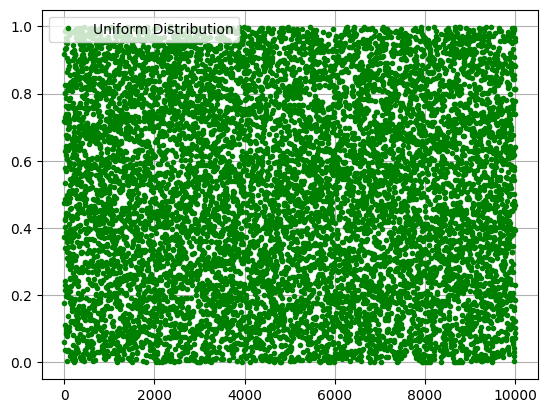

In [34]:
from matplotlib import pyplot as plt
x = np.random.rand(10000) #每个的概率
t = np.arange(len(x))
plt.plot(t,x,'g.',label="Uniform Distribution")
plt.legend(loc="upper left")
plt.grid()
plt.show()